<a href="https://colab.research.google.com/github/baisefuel/titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорты

In [2]:
import numpy as np
import pandas as pd

In [3]:
# @title Подгрузка датасета
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic.csv')

Mounted at /content/drive


# Аналитика

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [6]:
df.shape

(891, 12)

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

In [10]:
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [16]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [18]:
df['Age'].fillna(df['Age'].median(),inplace=True)

<ipython-input-18-e0c0624688bb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [19]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [21]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [22]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [23]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [24]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,3,413,0,28.0,1,2,675,23.4500,147,2
889,890,1,81,1,26.0,0,0,8,30.0000,60,0


In [25]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


Modeling

In [26]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.240839,-0.014205
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226


In [27]:
import numpy as np
np.var(df['Sex'])

0.22821808306282707

# Обучение

## Первая модель

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense


# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация стандартизатора
scaler = StandardScaler()
# Стандартизация обучающей и тестовой выборок
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
#Слои
model.add(Dense(7, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3846 - loss: 0.8092 - val_accuracy: 0.3846 - val_loss: 0.7713
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4419 - loss: 0.7294 - val_accuracy: 0.4406 - val_loss: 0.7186
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4968 - loss: 0.6932 - val_accuracy: 0.5245 - val_loss: 0.6800
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5654 - loss: 0.6525 - val_accuracy: 0.6154 - val_loss: 0.6481
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6372 - loss: 0.6359 - val_accuracy: 0.6853 - val_loss: 0.6202
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6864 - loss: 0.6173 - val_accuracy: 0.6993 - val_loss: 0.5950
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7146 - loss: 0.5949 - val_accuracy: 0.7343 - val_loss: 0.5732
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7592 - loss: 0.5717 - val_accuracy: 0.7273 - val_loss: 0.5529
Ep

In [29]:
import joblib
joblib.dump(model, 'fully-connected-model.pkl')

['fully-connected-model.pkl']

In [30]:
model_loaded = joblib.load('fully-connected-model.pkl')

In [31]:
model_loaded.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[0.1425102 ],
       [0.2936395 ],
       [0.32714415],
       [0.78334266],
       [0.6272033 ]], dtype=float32)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7835 - loss: 0.4740 - val_accuracy: 0.8042 - val_loss: 0.4589
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7645 - loss: 0.4849 - val_accuracy: 0.8042 - val_loss: 0.4571
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7830 - loss: 0.4801 - val_accuracy: 0.8042 - val_loss: 0.4544
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7951 - loss: 0.4482 - val_accuracy: 0.8112 - val_loss: 0.4521
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7739 - loss: 0.4914 - val_accuracy: 0.8182 - val_loss: 0.4499
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8060 - loss: 0.4609 - val_accuracy: 0.8182 - val_loss: 0.4480
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8078 - loss: 0.4321 - val_accuracy: 0.8112 - val_loss: 0.4455
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8041 - loss: 0.4449 - val_accuracy: 0.8182 - val_loss:

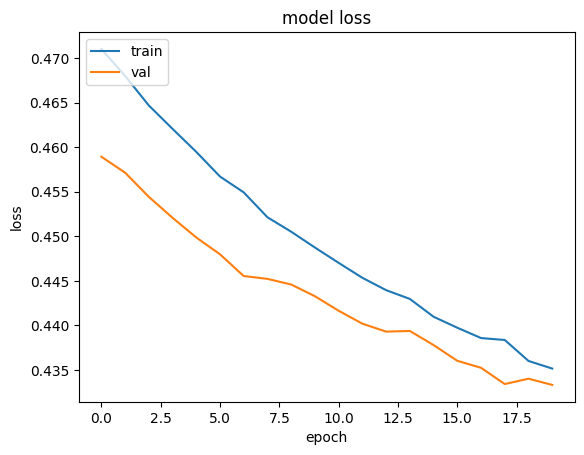

In [32]:
#Визуализация

import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

## Вторая модель

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
import matplotlib.pyplot as plt

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание нейронной сети с L2-регуляризацией и Dropout
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Обучение модели с увеличенным количеством эпох
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Оценка модели на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Визуализация процесса обучения
plt.figure(figsize=(12, 5))


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4528 - loss: 0.7836 - val_accuracy: 0.4825 - val_loss: 0.7276
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5828 - loss: 0.7023 - val_accuracy: 0.7063 - val_loss: 0.6648
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6395 - loss: 0.6770 - val_accuracy: 0.7902 - val_loss: 0.6215
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6785 - loss: 0.6375 - val_accuracy: 0.8042 - val_loss: 0.5867
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7484 - loss: 0.5979 - val_accuracy: 0.8112 - val_loss: 0.5558
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7221 - loss: 0.6192 - val_accuracy: 0.8252 - val_loss: 0.5318
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7159 - loss: 0.6063 - val_accuracy: 0.8322 - val_loss: 0.5116
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7614 - loss: 0.5765 - val_accuracy: 0.8322 - val_loss

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

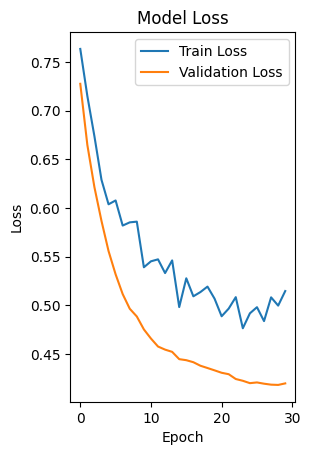

In [35]:
# График потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

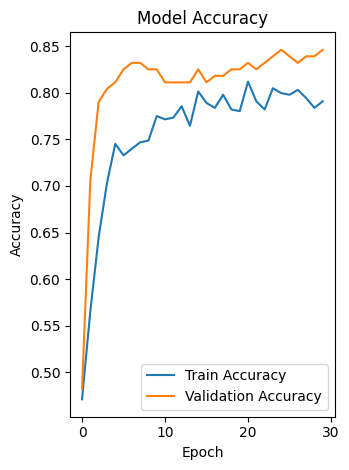

Test Accuracy: 0.82


In [36]:
# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()
print(f'Test Accuracy: {accuracy:.2f}')

## Третья модель

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# Функция создания модели
def create_model():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Настройка KFold кросс-валидации на 3 фолда
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
fold_index = 1

for fold, (train_index, val_index) in enumerate(kfold.split(X)):
    print(f"\nTraining for fold {fold + 1}...")

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Стандартизация данных
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)  # Ensure we transform X_val, not X_test

    # Инициализация модели
    model = create_model()

    # Обучение модели
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    # Оценка модели на тестовых данных текущего фолда
    y_pred = (model.predict(X_val) > 0.5).astype(int)  # Updated X_test to X_val

    # Построение Отчета классификации
    print("classification_report:")
    print(classification_report(y_val, y_pred))

    # Построение матрицы ошибок
    cm = confusion_matrix(y_val, y_pred)
    print("confusion_matrix:")
    print(cm)

    tn_fold, fp_fold, fn_fold, tp_fold = confusion_matrix(y_val, y_pred).ravel()
    tn += tn_fold
    fp += fp_fold
    fn += fn_fold
    tp += tp_fold

    # Вывод матрицы ошибок для текущего фолда
    print(f"Матрица ошибок для фолда {fold_index}:")
    print(f"Модель предсказала, что человек выживет, и он действительно выжил = {tn}")
    print(f"Модель предсказала, что человек выживет, а по факту он погиб = {fp}")
    print(f"Модель предсказала, что человек погибнет, но он выжил = {fn}")
    print(f"Модель предсказала, что человек погибнет, и он действительно погиб = {tp}")
    print("\n")
    fold_index += 1




Training for fold 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
classification_report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       177
           1       0.80      0.73      0.77       120

    accuracy                           0.82       297
   macro avg       0.81      0.80      0.81       297
weighted avg       0.82      0.82      0.82       297

confusion_matrix:
[[155  22]
 [ 32  88]]
Матрица ошибок для фолда 1:
Модель предсказала, что человек выживет, и он действительно выжил = 774
Модель предсказала, что человек выживет, а по факту он погиб = 129
Модель предсказала, что человек погибнет, но он выжил = 164
Модель предсказала, что человек погибнет, и он действительно погиб = 418



Training for fold 2...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
classification_report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       185
           1       0.76      0.73      0.75       112

    accuracy                           0.81       297
   macro avg       0.80      0.80      0.80       297
weighted avg       0.81      0.81      0.81       297

confusion_matrix:
[[159  26]
 [ 30  82]]
Матрица ошибок для фолда 2:
Модель предсказала, что человек выживет, и он действительно выжил = 933
Модель предсказала, что человек выживет, а по факту он погиб = 155
Модель предсказала, что человек погибнет, но он выжил = 194
Модель предсказала, что человек погибнет, и он действительно погиб = 500



Training for fold 3...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
classification_report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       187
           1       0.74      0.67      0.70       110

    accuracy                           0.79       297
   macro avg       0.78      0.77      0.77       297
weighted avg       0.79      0.79      0.79       297

confusion_matrix:
[[161  26]
 [ 36  74]]
Матрица ошибок для фолда 3:
Модель предсказала, что человек выживет, и он действительно выжил = 1094
Модель предсказала, что человек выживет, а по факту он погиб = 181
Модель предсказала, что человек погибнет, но он выжил = 230
Модель предсказала, что человек погибнет, и он действительно погиб = 574




Test accuracy: 0.82


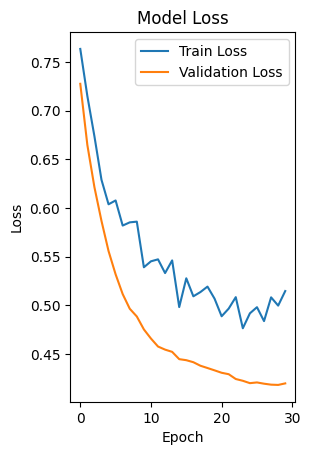

In [49]:
# Визуализация потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
print(f'Test accuracy: {accuracy:.2f}')

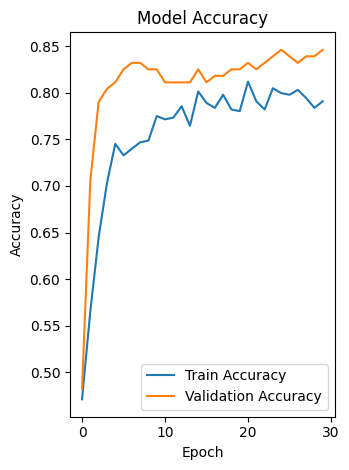

Test Accuracy: 0.82


In [48]:
# Визуализация точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()
print(f'Test Accuracy: {accuracy:.2f}')

# Графики выживаемости

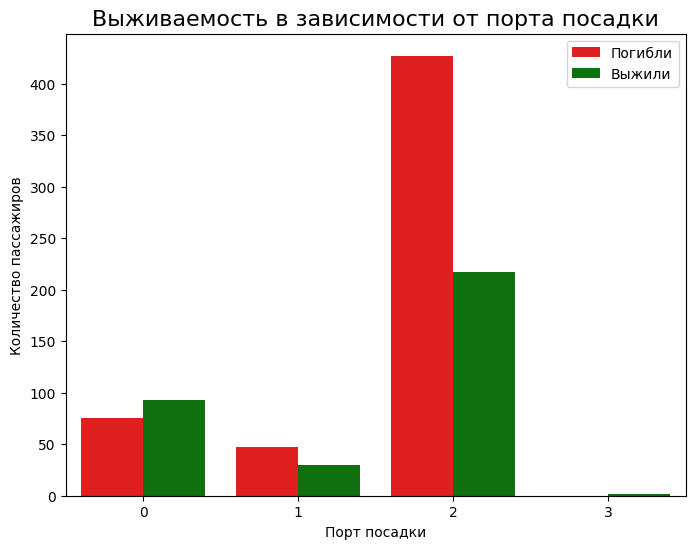

In [50]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=df, palette={0: 'red', 1: 'green'})
plt.title('Выживаемость в зависимости от порта посадки', fontsize=16)
plt.xlabel('Порт посадки')
plt.ylabel('Количество пассажиров')
plt.legend(['Погибли', 'Выжили'])
plt.show()

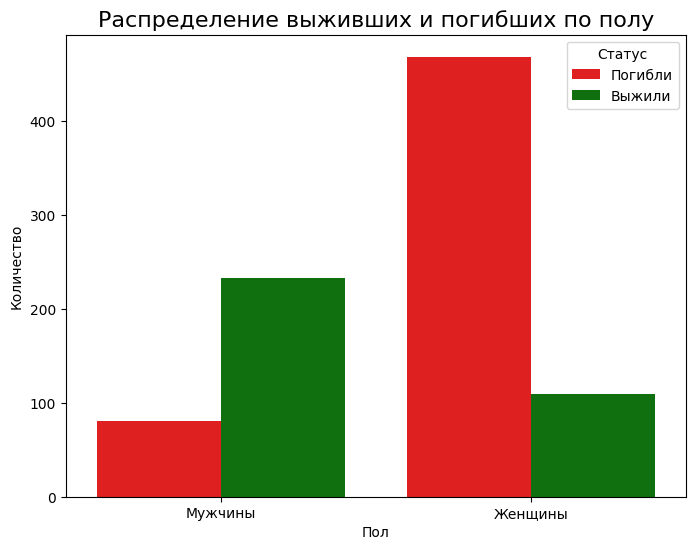

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette={0: 'red', 1: 'green'})
plt.xticks([0, 1], ['Мужчины', 'Женщины'])
plt.legend(title='Статус', loc='upper right', labels=['Погибли', 'Выжили'])
plt.title('Распределение выживших и погибших по полу', fontsize=16)
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()


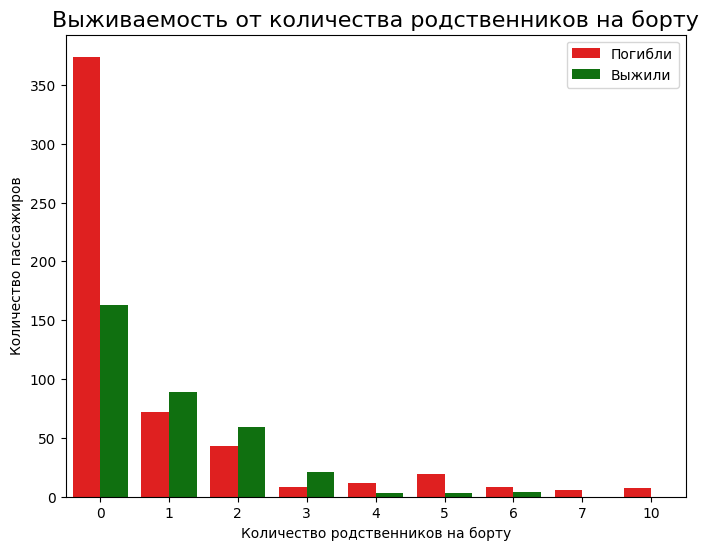

In [52]:
plt.figure(figsize=(8, 6))
df['Relatives'] = df['SibSp'] + df['Parch']
sns.countplot(x='Relatives', hue='Survived', data=df, palette={0: 'red', 1: 'green'})
plt.title('Выживаемость от количества родственников на борту', fontsize=16)
plt.xlabel('Количество родственников на борту')
plt.ylabel('Количество пассажиров')
plt.legend(['Погибли', 'Выжили'])
plt.show()

# Вывод


В рамках лабораторной работы я освоил методы предобработки и анализа данных перед обучением модели. В процессе работы были построены различные графики и выделены ключевые признаки для проведения анализа. Я разработал несколько нейронных моделей, обучил их и оценил их точность, используя кросс-валидацию, отчет классификации и матрицу ошибок.